In [246]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re
import random

In [247]:
df = pd.read_csv("covid_analytics_clinical_data.csv")
for col in df.columns:
    arr = df[col].to_numpy()
    if isinstance(arr[df[col].first_valid_index()],str):
        if re.search('.*%$', arr[df[col].first_valid_index()]):
            df[col] = (df[col].str.strip('%').astype(float))
        else:
            df[col] = df[col].str.lower()
            arr = df[col].to_numpy()
            arr = pd.unique(arr)
            classifier = np.array([i for i in range(len(arr))])
            df[col]=df[col].replace(arr,classifier)
df = df.fillna(-1)
df

,ID,SUB_ID,Country,Province/State,Study Pop Size (N),Proportion of values entered in row (%),Paper Title,Journal,Author,Source,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,1.0,0.0,0,0,191.0,60.11,0,0,0,0,...,11.52,8.90,1.0,0.26,0,0,0,20.0,0,0
1,1.0,1.0,0,0,54.0,60.11,0,0,0,0,...,37.04,29.63,1.0,0.72,1,0,1,7.5,1,1
2,1.0,2.0,0,0,137.0,60.11,0,0,0,0,...,1.46,0.73,1.0,0.08,2,1,2,20.0,2,2
3,2.0,0.0,0,0,199.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,0,2,3,28.0,3,3
4,2.0,1.0,0,0,99.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,3,3,4,28.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,202.0,2.0,2,56,99.0,23.60,175,40,88,202,...,-1.00,-1.00,1.0,0.32,71,0,28,-1.0,30,42
535,202.0,3.0,2,56,117.0,23.03,175,40,88,202,...,-1.00,-1.00,1.0,0.54,53,13,13,-1.0,24,57
536,202.0,4.0,2,56,247.0,25.84,175,40,88,202,...,-1.00,-1.00,1.0,0.39,47,0,28,-1.0,3,4
537,202.0,5.0,2,56,50.0,25.28,175,40,88,202,...,-1.00,-1.00,1.0,0.42,22,13,28,-1.0,38,25


In [248]:
sampled = df.sample(125)

[0.00742079 0.01609382 0.00278231 0.007919   0.00943816 0.00887176
 0.0080575  0.00750347 0.01011645 0.00902456 0.00337756 0.00034817
 0.0093684  0.00064872 0.00751297 0.01107498 0.00794776 0.00754862
 0.00795093 0.0002316  0.02277863 0.01413217 0.00787074 0.00457367
 0.0057403  0.00809413 0.00971299 0.01140713 0.00974399 0.00624878
 0.01900901 0.01040487 0.00272557 0.01462169 0.00374468 0.00197132
 0.00620006 0.00233657 0.00423264 0.00313983 0.0038438  0.00498221
 0.00113383 0.00066196 0.00133083 0.00247941 0.00532564 0.00405346
 0.00363992 0.00361854 0.01025828 0.00120961 0.00429486 0.00724306
 0.0176549  0.01124622 0.02021968 0.00924335 0.00872475 0.01268268
 0.00737136 0.01023446 0.01075333 0.00961699 0.00775729 0.0041599
 0.00149859 0.00328264 0.01432326 0.00510404 0.00365074 0.00606156
 0.00600665 0.00527141 0.00202173 0.00512871 0.00479233 0.00421906
 0.00481991 0.00284255 0.00345463 0.00076607 0.00671299 0.0261842
 0.00307952 0.00638081 0.01313928 0.00508109 0.00681417 0.005174

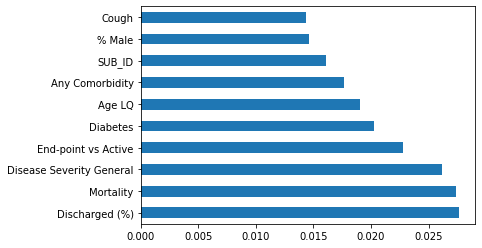

In [249]:

x = sampled.iloc[:, 0:161]
y = sampled.iloc[:, -1]
y = y.astype('int')

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [250]:
new_df = np.array(sampled[[]])
new_df

array([], shape=(125, 0), dtype=float64)

In [251]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

ValueError: Found array with 0 feature(s) (shape=(125, 0)) while a minimum of 1 is required.